In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
# read data 
input_data = pd.read_csv("/content/drive/MyDrive/CS5344 Group9/BTC Price Pred Code/final_data_lag_days_1.csv", sep=",")
# input_data = pd.read_csv("/content/drive/MyDrive/CS5344 Group9/Raw_Data/score.csv", sep=",")
input_data["Pct_change"] = (input_data["Close"] > input_data["Close"].shift(1)).astype(int)
input_data.dropna(inplace=True)

In [ ]:
input_data.head(5)

,DateTime,Close,Volume_(BTC),Weighted_Price,neg_pol,neu_pol,pos_pol,compound,dt,Tweet_vol,Pct_change
0,2018-08-30 11:00:00+00:00,6948.19,2.294827,6949.027819,0.052429,0.840286,0.107429,0.142957,2018-08-30 11:31:22.500000+00:00,18.0,0
1,2018-08-30 12:00:00+00:00,6946.06,2.403298,6948.538022,0.083429,0.809000,0.107714,0.018929,2018-08-30 12:28:32.903225856+00:00,47.0,0
2,2018-08-30 13:00:00+00:00,6963.30,3.849932,6963.365360,0.034800,0.863200,0.102000,0.342700,2018-08-30 13:28:30.967741696+00:00,45.0,1
3,2018-08-30 14:00:00+00:00,6900.00,9.401061,6931.412043,0.034917,0.819750,0.145333,0.353200,2018-08-30 14:28:45.714285824+00:00,47.0,0
4,2018-08-30 15:00:00+00:00,6929.54,6.849490,6911.641662,0.060000,0.814643,0.125429,0.192350,2018-08-30 15:27:30.937500160+00:00,48.0,1


In [ ]:
input_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 10803
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        10784 non-null  object 
 1   Close           10784 non-null  float64
 2   Volume_(BTC)    10784 non-null  float64
 3   Weighted_Price  10784 non-null  float64
 4   neg_pol         10784 non-null  float64
 5   neu_pol         10784 non-null  float64
 6   pos_pol         10784 non-null  float64
 7   compound        10784 non-null  float64
 8   dt              10784 non-null  object 
 9   Tweet_vol       10784 non-null  float64
 10  Pct_change      10784 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 1011.0+ KB


In [ ]:
import statsmodels.formula.api as smf
model = smf.logit(formula = 'Pct_change ~ compound', data = input_data).fit() 

Optimization terminated successfully.
         Current function value: 0.693058
         Iterations 3


In [ ]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Pct_change   No. Observations:                10784
Model:                          Logit   Df Residuals:                    10782
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:               3.663e-06
Time:                        13:08:31   Log-Likelihood:                -7473.9
converged:                       True   LL-Null:                       -7474.0
Covariance Type:            nonrobust   LLR p-value:                    0.8150
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0350      0.042      0.838      0.402      -0.047       0.117
compound      -0.0348      0.149     -0.234      0.815      -0.326       0.256
==============================================================================
"""

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
predicted_values1 = model.predict()
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = confusion_matrix(input_data['Pct_change'],predicted_class1)
print('Confusion Matrix : \n', cm1)  
acc = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][1]+cm1[1][0])

Confusion Matrix : 
 [[   0 5321]
 [   0 5463]]


In [ ]:
print("Accuracy = ", acc)

Accuracy =  0.506583827893175


Using New Data

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import yfinance as yf

In [ ]:
tweet_data = pd.read_csv('/content/drive/My Drive/CS5344 Group9/Raw_Data/score.csv', sep=",")

In [ ]:
# floor hour 
def process_datetime(datetime):
  return datetime.split("+")[0]

tweet_data["Hr_int"] = pd.to_datetime(tweet_data["Datetime"].apply(process_datetime)).dt.floor("1H")
tweet_data.head(5)

,Unnamed: 0,Tweet_ID,Datetime,Account_Name,Text,Response,sentiment_score,Hr_int
0,0,1584333732278079489,2022-10-23 23:59:31+00:00,nohalfsends9,$MATIC back over 90c and closing in on passing...,matic back over c and closing in on passing...,0.2023,2022-10-23 23:00:00
1,1,1584333624551174145,2022-10-23 23:59:06+00:00,Mspretty_925,This is great news for #Terareum and #TeraExch...,this is great news for #terareum and #teraexch...,0.6249,2022-10-23 23:00:00
2,2,1584332715612319744,2022-10-23 23:55:29+00:00,trader_koala,$BTC idea\n\nI will look to add to longs if gi...,btc idea i will look to add to longs if give...,-0.5423,2022-10-23 23:00:00
3,3,1584332494123716608,2022-10-23 23:54:36+00:00,Bilo888,$BTC struggling with its 50SMA on daily TF aga...,btc struggling with its sma on daily tf aga...,-0.4215,2022-10-23 23:00:00
4,4,1584331928806707200,2022-10-23 23:52:21+00:00,take_gains,"Unpopular opinion. $BTC\n\n19,355 holds or 18,...",unpopular opinion btc holds or ...,0.0000,2022-10-23 23:00:00


In [ ]:
# get tweet volumn 
copy_tweet = tweet_data.copy()
grouped_volumes = copy_tweet.groupby(pd.Grouper(key='Hr_int',freq="1H")).size().reset_index(name='tweet_vol')
grouped_volumes["Hr_int"] = grouped_volumes["Hr_int"].astype(str)
#set index to datetime
grouped_volumes.index = pd.to_datetime(grouped_volumes.index)
grouped_volumes = grouped_volumes.set_index('Hr_int')
#set type of volumes to float
grouped_volumes['tweet_vol'] = grouped_volumes['tweet_vol'].astype(float)
grouped_volumes.head(5)

,tweet_vol
Hr_int,
2022-03-01 04:00:00,14.0
2022-03-01 05:00:00,133.0
2022-03-01 06:00:00,127.0
2022-03-01 07:00:00,145.0
2022-03-01 08:00:00,172.0


In [ ]:
# Group Tweet 
#replace empty text with empty string
copy_tweet['Text'] = copy_tweet['Text'].fillna('')
#remove extra columns
copy_tweet = copy_tweet.drop(['Unnamed: 0'], axis=1)
# copy_tweet = copy_tweet.drop(['index'], axis=1)
copy_tweet["Hr_int"] = copy_tweet["Hr_int"].astype(str)
# set Hr_int as index 
copy_tweet = copy_tweet.set_index('Hr_int')

In [ ]:
copy_tweet.head(5)

,Tweet_ID,Datetime,Account_Name,Text,Response,sentiment_score
Hr_int,,,,,,
2022-10-23 23:00:00,1584333732278079489,2022-10-23 23:59:31+00:00,nohalfsends9,$MATIC back over 90c and closing in on passing...,matic back over c and closing in on passing...,0.2023
2022-10-23 23:00:00,1584333624551174145,2022-10-23 23:59:06+00:00,Mspretty_925,This is great news for #Terareum and #TeraExch...,this is great news for #terareum and #teraexch...,0.6249
2022-10-23 23:00:00,1584332715612319744,2022-10-23 23:55:29+00:00,trader_koala,$BTC idea\n\nI will look to add to longs if gi...,btc idea i will look to add to longs if give...,-0.5423
2022-10-23 23:00:00,1584332494123716608,2022-10-23 23:54:36+00:00,Bilo888,$BTC struggling with its 50SMA on daily TF aga...,btc struggling with its sma on daily tf aga...,-0.4215
2022-10-23 23:00:00,1584331928806707200,2022-10-23 23:52:21+00:00,take_gains,"Unpopular opinion. $BTC\n\n19,355 holds or 18,...",unpopular opinion btc holds or ...,0.0000


In [ ]:
# group by hour and take the average of values in that day
# copy_tweet['Text'] = copy_tweet['Text'].astype(str)
# tweets_grouped = copy_tweet.groupby(pd.Grouper(key='Hr_int',freq="1H")).agg(lambda x : ''.join(x + ' '))["Text"]
#group by hour and take the average of values in that day
df_grouped = copy_tweet.groupby(pd.Grouper(key='Hr_int',freq="1H")).agg(lambda x: x.mean())
df_grouped.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/usr/lo

,Unnamed: 0,Tweet_ID,sentiment_score
Hr_int,,,
2022-03-01 04:00:00,499072.5,1.498523e+18,-0.082864
2022-03-01 05:00:00,498999.0,1.498530e+18,0.203989
2022-03-01 06:00:00,498869.0,1.498547e+18,0.118734
2022-03-01 07:00:00,498733.0,1.498562e+18,0.150883
2022-03-01 08:00:00,498574.5,1.498576e+18,0.189309


In [ ]:
#add tweet volume to df
df_grouped['Tweet_vol'] = grouped_volumes['tweet_vol']
# df_grouped.head(5)

In [ ]:
df_grouped.head(5)

,Unnamed: 0,Tweet_ID,sentiment_score,Tweet_vol
Hr_int,,,,
2022-03-01 04:00:00+00:00,499072.5,1.498523e+18,-0.082864,NaN
2022-03-01 05:00:00+00:00,498999.0,1.498530e+18,0.203989,NaN
2022-03-01 06:00:00+00:00,498869.0,1.498547e+18,0.118734,NaN
2022-03-01 07:00:00+00:00,498733.0,1.498562e+18,0.150883,NaN
2022-03-01 08:00:00+00:00,498574.5,1.498576e+18,0.189309,NaN


In [ ]:
ticker_list =['BTC-USD','ETH-USD','BNB-USD']
# change start and end data to adjust the time period  
data = yf.Ticker("BTC-USD").history(interval='1h', start='2022-03-01',end='2022-10-24')
columns=['Open','High','Low','Close','Volume']
data_day = data[columns]

data_day_labeled = data_day.copy()
data_day_labeled["Hr_int"] = data_day_labeled.index 
data_day_labeled["Hr_int"] = data_day_labeled["Hr_int"].astype(str).apply(process_datetime)
data_day_labeled['Pct_change'] = data_day.pct_change()['Close']
data_day_labeled['Up_down'] =['UP' if i> 0 else 'DOWN' for i in data_day_labeled['Pct_change']]
data_day_labeled = data_day_labeled.set_index("Hr_int")
data_day_labeled.head(5)

,Open,High,Low,Close,Volume,Pct_change,Up_down
Hr_int,,,,,,,
2022-03-01 00:00:00,43194.835938,43549.796875,43194.835938,43507.128906,996782080,NaN,DOWN
2022-03-01 01:00:00,43521.347656,43561.902344,43279.511719,43279.511719,0,-0.005232,DOWN
2022-03-01 02:00:00,43277.531250,43277.531250,43061.082031,43140.046875,515710976,-0.003222,DOWN
2022-03-01 03:00:00,43143.882812,43143.882812,42952.585938,43109.265625,139329536,-0.000714,DOWN
2022-03-01 04:00:00,43121.613281,43323.992188,43110.554688,43321.121094,623972352,0.004914,UP


In [ ]:
data_day_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 2022-03-01 00:00:00 to 2022-10-23 23:00:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        5688 non-null   float64
 1   High        5688 non-null   float64
 2   Low         5688 non-null   float64
 3   Close       5688 non-null   float64
 4   Volume      5688 non-null   int64  
 5   Pct_change  5687 non-null   float64
 6   Up_down     5688 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 355.5+ KB


In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5684 entries, 2022-03-01 04:00:00+00:00 to 2022-10-23 23:00:00+00:00
Freq: H
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5637 non-null   float64
 1   Tweet_ID         5637 non-null   float64
 2   sentiment_score  5637 non-null   float64
 3   Tweet_vol        0 non-null      float64
dtypes: float64(4)
memory usage: 222.0 KB


In [ ]:
type(df_grouped.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
type(data_day_labeled.index)

pandas.core.indexes.base.Index

In [ ]:
df_grouped.index = df_grouped.index.tz_convert(None)
# data_day_labeled.index.tz_convert(None)


In [ ]:
data_day_labeled.index = pd.to_datetime(data_day_labeled.index)
data_day_labeled.index = data_day_labeled.index.tz_localize(None)

In [ ]:
merged = pd.concat([df_grouped, data_day_labeled], axis=1)

In [ ]:
merged.head(5)

,Unnamed: 0,Tweet_ID,sentiment_score,Tweet_vol,Open,High,Low,Close,Volume,Pct_change,Up_down
Hr_int,,,,,,,,,,,
2022-03-01 00:00:00,NaN,NaN,NaN,NaN,43194.835938,43549.796875,43194.835938,43507.128906,996782080,NaN,DOWN
2022-03-01 01:00:00,NaN,NaN,NaN,NaN,43521.347656,43561.902344,43279.511719,43279.511719,0,-0.005232,DOWN
2022-03-01 02:00:00,NaN,NaN,NaN,NaN,43277.531250,43277.531250,43061.082031,43140.046875,515710976,-0.003222,DOWN
2022-03-01 03:00:00,NaN,NaN,NaN,NaN,43143.882812,43143.882812,42952.585938,43109.265625,139329536,-0.000714,DOWN
2022-03-01 04:00:00,499072.5,1.498523e+18,-0.082864,NaN,43121.613281,43323.992188,43110.554688,43321.121094,623972352,0.004914,UP


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5688 entries, 2022-03-01 00:00:00 to 2022-10-23 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5637 non-null   float64
 1   Tweet_ID         5637 non-null   float64
 2   sentiment_score  5637 non-null   float64
 3   Tweet_vol        0 non-null      float64
 4   Open             5688 non-null   float64
 5   High             5688 non-null   float64
 6   Low              5688 non-null   float64
 7   Close            5688 non-null   float64
 8   Volume           5688 non-null   int64  
 9   Pct_change       5687 non-null   float64
 10  Up_down          5688 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 533.2+ KB


In [ ]:
# merge data 
# df_grouped['Hr_int']=pd.concat(df_grouped['Hr_int'])
# data_day_labeled['Hr_int']=data_day_labeled['Hr_int'].astype(int)
# df_grouped.index = df_grouped.index.tz_localize('utc')
# data_day_labeled.index = data_day_labeled.index.tz_convert('utc')
# merged_tweet = df_grouped.join(data_day_labeled)
merged = merged[['sentiment_score', 'Tweet_vol', 'Close', 'Volume', 'Pct_change', 'Up_down']]
# merged_tweet.shape[0]

In [ ]:
merged.head(5)

,sentiment_score,Tweet_vol,Close,Volume,Pct_change,Up_down
Hr_int,,,,,,
2022-03-01 00:00:00,NaN,NaN,43507.128906,996782080,NaN,DOWN
2022-03-01 01:00:00,NaN,NaN,43279.511719,0,-0.005232,DOWN
2022-03-01 02:00:00,NaN,NaN,43140.046875,515710976,-0.003222,DOWN
2022-03-01 03:00:00,NaN,NaN,43109.265625,139329536,-0.000714,DOWN
2022-03-01 04:00:00,-0.082864,NaN,43321.121094,623972352,0.004914,UP


In [ ]:
merged.to_csv("/content/drive/My Drive/CS5344 Group9/Raw_Data/merged_data.csv", sep=",")

Testing T^T

In [ ]:
import pandas as pd
# read data 
# input_data = pd.read_csv("/content/drive/MyDrive/CS5344 Group9/BTC Price Pred Code/final_data_lag_days_1.csv", sep=",")
input_data = pd.read_csv("/content/drive/MyDrive/CS5344 Group9/Raw_Data/merged_test.csv", sep=",")
input_data = input_data.drop(columns=['Tweet_ID', 'Tweet_vol', 'Unnamed: 0', 'Open', 'High', 'Low', 'Volume', 'Up_down'])
input_data["Pct_change"] = (input_data["Close"] > input_data["Close"].shift(1)).astype(int)
input_data.dropna(inplace=True)

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 4 to 5687
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hr_int           5637 non-null   object 
 1   sentiment_score  5637 non-null   float64
 2   Close            5637 non-null   float64
 3   Pct_change       5637 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 220.2+ KB


In [ ]:
input_data

,Hr_int,sentiment_score,Close,Pct_change
4,2022-03-01 04:00:00,-0.082864,43321.121094,1
5,2022-03-01 05:00:00,0.203989,43202.832031,0
6,2022-03-01 06:00:00,0.118734,43411.617188,1
7,2022-03-01 07:00:00,0.150883,43433.382812,1
8,2022-03-01 08:00:00,0.189309,43432.691406,0
...,...,...,...,...
5683,2022-10-23 19:00:00,0.099854,19505.166016,1
5684,2022-10-23 20:00:00,0.166459,19500.291016,0
5685,2022-10-23 21:00:00,0.193904,19527.109375,1
5686,2022-10-23 22:00:00,0.124135,19592.498047,1


In [ ]:
import statsmodels.formula.api as smf
model = smf.logit(formula = 'Pct_change ~ sentiment_score', data = input_data).fit() 

Optimization terminated successfully.
         Current function value: 0.692089
         Iterations 4


In [ ]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Pct_change   No. Observations:                 5637
Model:                          Logit   Df Residuals:                     5635
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                0.001481
Time:                        13:39:17   Log-Likelihood:                -3901.3
converged:                       True   LL-Null:                       -3907.1
Covariance Type:            nonrobust   LLR p-value:                 0.0006706
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3089      0.090     -3.420      0.001      -0.486      -0.132
sentiment_score     1.5022      0.442      3.395      0.001       0.635       2.369
===================================================================================
"""

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
predicted_values1 = model.predict()
threshold=0.5
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = confusion_matrix(input_data['Pct_change'],predicted_class1)
print('Confusion Matrix : \n', cm1)  
acc = (cm1[0][0]+cm1[1][1])/(cm1[0][0]+cm1[0][1]+cm1[1][1]+cm1[1][0])

Confusion Matrix : 
 [[1661 1180]
 [1578 1218]]


In [ ]:
print("Accuracy = ", acc)

Accuracy =  0.510732659215895


Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
input_data = pd.read_csv("/content/drive/MyDrive/CS5344 Group9/Raw_Data/merged_data.csv", sep=",")
input_data = input_data.drop(columns=['Tweet_vol'])
# input_data["Pct_change"] = (input_data["Close"] > input_data["Close"].shift(1)).astype(int)
input_data.dropna(inplace=True)

In [ ]:
input_data.head(5)

,Hr_int,sentiment_score,Close,Volume,Pct_change,Up_down
4,2022-03-01 04:00:00,-0.082864,43321.121094,623972352,0.004914,UP
5,2022-03-01 05:00:00,0.203989,43202.832031,70135808,-0.002731,DOWN
6,2022-03-01 06:00:00,0.118734,43411.617188,105054208,0.004833,UP
7,2022-03-01 07:00:00,0.150883,43433.382812,0,0.000501,UP
8,2022-03-01 08:00:00,0.189309,43432.691406,212996096,-0.000016,DOWN


In [ ]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 4 to 5687
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hr_int           5637 non-null   object 
 1   sentiment_score  5637 non-null   float64
 2   Close            5637 non-null   float64
 3   Volume           5637 non-null   int64  
 4   Pct_change       5637 non-null   float64
 5   Up_down          5637 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 308.3+ KB


In [ ]:
x = input_data["sentiment_score"].values.reshape(-1,1)
y = input_data["Pct_change"].values.reshape(-1,1)
# regr.fit(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# model = LinearRegression().fit(x, y)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-0.00180336]
[[0.0085359]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,-0.000776,-0.000433
1,-0.000169,-0.000375
2,0.001711,-0.000237
3,0.000041,0.000077
4,0.000927,0.000155
...,...,...
1123,0.009375,-0.000150
1124,-0.001576,-0.000216
1125,0.004474,-0.000415
1126,0.012168,-0.000311


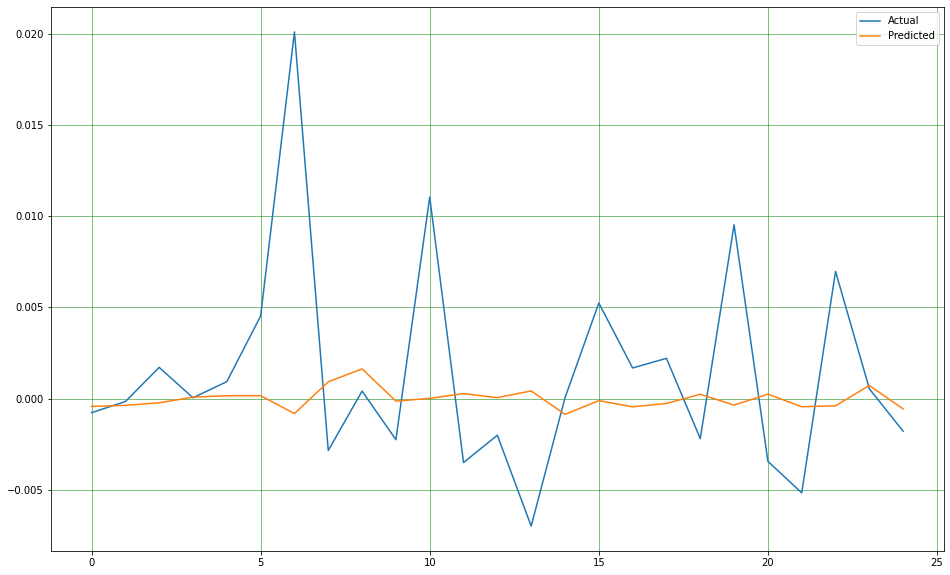

In [ ]:
df1 = df.head(25)
df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

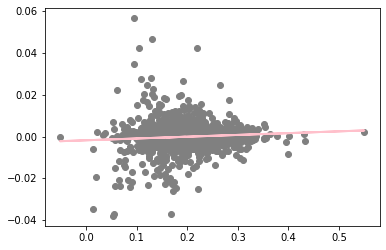

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='pink', linewidth=2)
plt.show()

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.005489255704060336


In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [-0.0017078]
slope: [[0.00811364]]


In [ ]:
import statsmodels.api as sm

#define response variable
# y = df['y']

#define predictor variables
# x = df[['x1', 'x2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.10
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           2.56e-08
Time:                        14:16:07   Log-Likelihood:                 20304.
No. Observations:                5637   AIC:                        -4.060e+04
Df Residuals:                    5635   BIC:                        -4.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.000     -5.750      0.0